In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)
import matplotlib.pyplot as plt # to plot
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
!pip install keras-tuner # Install keras-tuner
import keras_tuner as kt # Now import keras_tuner

from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('gdrive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00
Mounted at gdrive


In [ ]:
def leeDatos():

    dataSet = pd.read_csv("gdrive/MyDrive/Colab Notebooks/archive1.zip", header=0, compression='zip')

    return dataSet

In [ ]:
def encodeData(dataSet=0):
    dataSet.dropna(inplace=True)

    # Remove any 'neutral' ratings
    dataSet['sentiment'] = ["negative" if x == "neutral" else x for x in dataSet['sentiment']]
    dataSet['sent_analysis'] = np.where(dataSet['sentiment'] == "positive", 1, 0)
    datos = ['text', 'sent_analysis']
    misDatos = dataSet[datos]

    return misDatos

In [ ]:
datos = leeDatos()
print(datos)
print("\n")

encodeDatos = encodeData(datos)
print(encodeDatos)
print("\n")
print(encodeDatos['sent_analysis'].mean())
print("\n")

     Year  Month  Day Time of Tweet  \
0    2018      8   18       morning   
1    2018      8   18          noon   
2    2017      8   18         night   
3    2022      6    8       morning   
4    2022      6    8          noon   
..    ...    ...  ...           ...   
494  2015     10   18         night   
495  2021      2   25       morning   
496  2022      5   30          noon   
497  2018      8   10         night   
498  2019      3   25       morning   

                                                  text sentiment     Platform  
0                What a great day!!! Looks like dream.  positive    Twitter    
1       I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                       Don't angry me  negative     Facebook  
3    We attend in the class just for listening teac...  negative    Facebook   
4                    Those who want to go, let them go  negative   Instagram   
..                                                 

In [ ]:
ts_size = .25
trainSet, testSet = train_test_split(encodeDatos, test_size=ts_size, shuffle=False, random_state=0)
print(trainSet)
print('trainSet shape: ', trainSet.shape)
print(testSet)
print('testSet shape: ', testSet.shape)
print("\n")

                                                  text  sent_analysis
0                What a great day!!! Looks like dream.              1
1       I feel sorry, I miss you here in the sea beach              1
2                                       Don't angry me              0
3    We attend in the class just for listening teac...              0
4                    Those who want to go, let them go              0
..                                                 ...            ...
369       l`m on 3 days too matt. No fun this weekend.              0
370   u really don`t think so?  maybe ur right....l...              0
371             I feel your pain. Mine is the same way              0
372                             comes home in two days              0
373               Sadly no. It didn`t come with one...              0

[374 rows x 2 columns]
trainSet shape:  (374, 2)
                                                  text  sent_analysis
374                   Cant wait to see m

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

training_sentences= trainSet['text']
training_labels = trainSet['sent_analysis']
testing_sentences = testSet['text']
testing_labels = testSet['sent_analysis']

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

NameError: name 'Tokenizer' is not defined

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
MLP_model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length),
                    #GlobalAveragePooling1D(),
                    Flatten(),
                    Dense(16, activation='relu', name="Hidden_layer_1"),
                    Dense(8, activation='relu', name="Hidden_layer_2"),
                    Dense(1, activation='sigmoid', name="Outpul_layer")
                    ])

In [ ]:
opt = 'adam'
loss_fun = 'binary_crossentropy'
acc = ['accuracy']

In [ ]:
MLP_model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [ ]:
MLP_model.summary()

NameError: name 'MLP_model' is not defined

In [ ]:
num_epochs = 30

MLP_history = MLP_model.fit(training_padded,
                    training_labels,
                    validation_split=0.25,
                    epochs=num_epochs,
                    verbose=2)

NameError: name 'MLP_model' is not defined

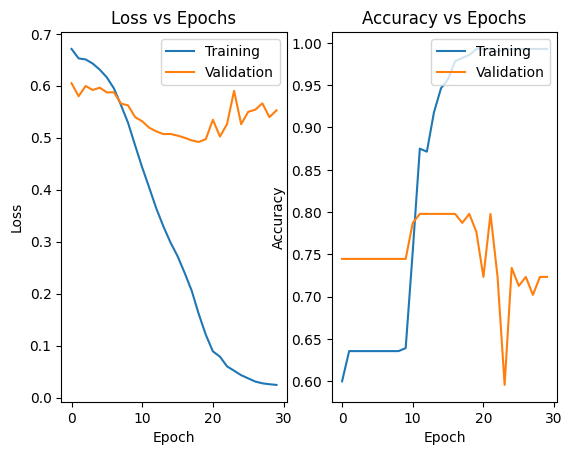

In [ ]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(MLP_history.history['loss'])
plt.plot(MLP_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(MLP_history.history['accuracy'])
plt.plot(MLP_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
CNN_model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length),
                    Conv1D(filters=2, kernel_size=3, activation='relu', name="Conv1D"),
                    AveragePooling1D(pool_size=3),
                    Flatten(),
                    Dense(2, activation='relu'),
                    Dense(1, activation='sigmoid', name="Outpul_layer")
                    ])

In [ ]:
CNN_model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [ ]:
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d (AveragePooling1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outpul_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN_history = CNN_model.fit(training_padded,
                    training_labels,
                    validation_split=0.1,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
11/11 - 3s - 248ms/step - accuracy: 0.6548 - loss: 0.6864 - val_accuracy: 0.7368 - val_loss: 0.6785
Epoch 2/30
11/11 - 0s - 26ms/step - accuracy: 0.6548 - loss: 0.6718 - val_accuracy: 0.7368 - val_loss: 0.6603
Epoch 3/30
11/11 - 0s - 25ms/step - accuracy: 0.6548 - loss: 0.6538 - val_accuracy: 0.7368 - val_loss: 0.6360
Epoch 4/30
11/11 - 0s - 11ms/step - accuracy: 0.6548 - loss: 0.6342 - val_accuracy: 0.7368 - val_loss: 0.6166
Epoch 5/30
11/11 - 0s - 12ms/step - accuracy: 0.6548 - loss: 0.6231 - val_accuracy: 0.7368 - val_loss: 0.6087
Epoch 6/30
11/11 - 0s - 12ms/step - accuracy: 0.6548 - loss: 0.6156 - val_accuracy: 0.7368 - val_loss: 0.6078
Epoch 7/30
11/11 - 0s - 11ms/step - accuracy: 0.6548 - loss: 0.6090 - val_accuracy: 0.7368 - val_loss: 0.6079
Epoch 8/30
11/11 - 0s - 11ms/step - accuracy: 0.6548 - loss: 0.6000 - val_accuracy: 0.7368 - val_loss: 0.6042
Epoch 9/30
11/11 - 0s - 12ms/step - accuracy: 0.6548 - loss: 0.5892 - val_accuracy: 0.7368 - val_loss: 0.5993
Epoch 10/

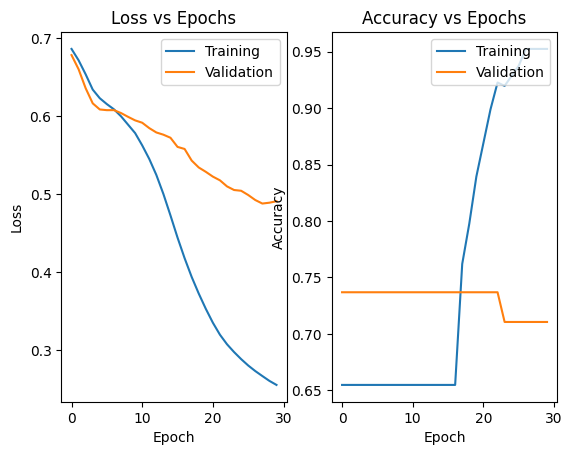

In [ ]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
dropout_rate = 0.2
LSTM_model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length),
                    LSTM(32, return_sequences = True),
                    Dropout(dropout_rate),
                    LSTM(16, return_sequences = True),
                    Dropout(dropout_rate),
                    LSTM(8),
                    Dropout(dropout_rate),
                    Dense(1, name="Outpul_layer")
                    ])

NameError: name 'Sequential' is not defined

In [ ]:
LSTM_model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [ ]:
LSTM_history = LSTM_model.fit(training_padded,
                    training_labels,
                    validation_split=0.1,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
11/11 - 9s - 800ms/step - accuracy: 0.6548 - loss: 5.5646 - val_accuracy: 0.7368 - val_loss: 4.2416
Epoch 2/30
11/11 - 3s - 309ms/step - accuracy: 0.6548 - loss: 5.5646 - val_accuracy: 0.7368 - val_loss: 4.2416
Epoch 3/30
11/11 - 1s - 99ms/step - accuracy: 0.6548 - loss: 5.5646 - val_accuracy: 0.7368 - val_loss: 4.2416
Epoch 4/30
11/11 - 1s - 116ms/step - accuracy: 0.6548 - loss: 5.5646 - val_accuracy: 0.7368 - val_loss: 4.2416
Epoch 5/30
11/11 - 1s - 115ms/step - accuracy: 0.6548 - loss: 5.5646 - val_accuracy: 0.7368 - val_loss: 4.2416
Epoch 6/30
11/11 - 1s - 99ms/step - accuracy: 0.6548 - loss: 5.5646 - val_accuracy: 0.7368 - val_loss: 4.2416
Epoch 7/30
11/11 - 1s - 117ms/step - accuracy: 0.6548 - loss: 5.5646 - val_accuracy: 0.7368 - val_loss: 4.2416
Epoch 8/30
11/11 - 1s - 133ms/step - accuracy: 0.6548 - loss: 5.5646 - val_accuracy: 0.7368 - val_loss: 4.2416
Epoch 9/30
11/11 - 3s - 268ms/step - accuracy: 0.6548 - loss: 5.5646 - val_accuracy: 0.7368 - val_loss: 4.2416
Epo

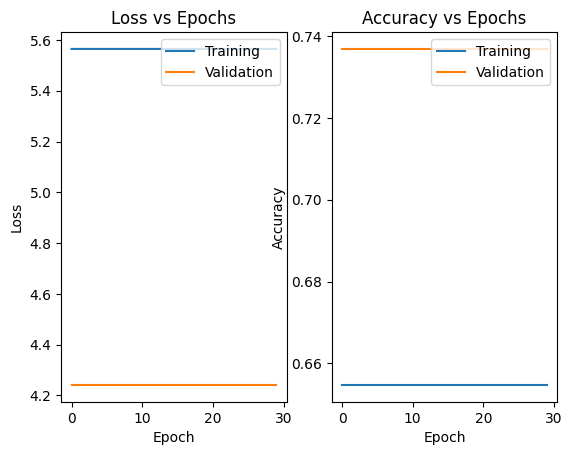

In [ ]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# test data
df_test = pd.DataFrame()
df_test['real'] = testing_labels
df_test['MLP pred'] = MLP_model.predict(testing_padded).reshape(1,len(testing_padded))[0]
df_test['CNN pred'] = CNN_model.predict(testing_padded).reshape(1,len(testing_padded))[0]
df_test['LSTM pred'] = LSTM_model.predict(testing_padded).reshape(1,len(testing_padded))[0]

print(round(df_test))
print("\n")

df_perf = pd.DataFrame()
df_perf['MLP'] = MLP_model.evaluate(testing_padded,testing_labels, verbose=2)
df_perf['CNN'] = CNN_model.evaluate(testing_padded,testing_labels, verbose=2)
df_perf['LSTM'] = LSTM_model.evaluate(testing_padded,testing_labels, verbose=2)
df_perf.index = ['Loss', 'Accuracy']
print(df_perf)
print("\n")

report = classification_report(testing_labels, round(df_test['MLP pred']), output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
print("\n")

report = classification_report(testing_labels, round(df_test['CNN pred']), output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
print("\n")

report = classification_report(testing_labels, round(df_test['LSTM pred']), output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
print("\n")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step
     real  MLP pred  CNN pred  LSTM pred
0       1       0.0       0.0       -0.0
1       0       0.0       0.0       -0.0
2       0       0.0       0.0       -0.0
3       1       1.0       0.0       -0.0
4       1       0.0       0.0       -0.0
..    ...       ...       ...        ...
120     0       0.0       0.0       -0.0
121     0       0.0       0.0       -0.0
122     0       0.0       0.0       -0.0
123     1       0.0       0.0       -0.0
124     0       0.0       0.0       -0.0

[125 rows x 4 columns]


4/4 - 0s - 11ms/step - accuracy: 0.6160 - loss: 0.7577
4/4 - 0s - 14ms/step - accuracy: 0.6960 - loss: 0.7302
4/4 - 0s - 40ms/step - accuracy: 0.6800 - loss: 5.1578
               MLP       CNN      LSTM
Loss      0.757652  0.730232  5.157791
Accuracy  0.616000  0.696000  0.680000


              precision    recall  f1-score  support
0              0.712644  0.729412  0.720930   85.000
1              0.394737  0.375000  0.384615   40.000


In [ ]:
def MLP_model_builder(hp):
    vocab_size = 10000
    hp_embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=40 , step=8)
    hp_max_length = hp.Int('input_length', min_value=70, max_value=130, step=10)
    hp_units_mlp1 = hp.Int('units_mlp1', min_value=16, max_value=40, step=8)
    hp_units_mlp2 = hp.Int('units_mlp2', min_value=8, max_value=32, step=8)
    hp_activation_dense1 = hp.Choice('activation_conv', values=['relu', 'sigmoid', 'tanh'])
    hp_activation_dense2 = hp.Choice('activation_dense', values=['relu', 'sigmoid', 'tanh'])
    hp_activation_dense3 = hp.Choice('activation_dense', values=['relu', 'sigmoid', 'tanh'])
    model = Sequential([
        Embedding(vocab_size, hp_embedding_dim, input_length=hp_max_length),
        Flatten(),
        Dense(units=hp_units_mlp1, activation=hp_activation_dense1, name="Hidden_layer_1"),
        Dense(units=hp_units_mlp2, activation=hp_activation_dense2, name="Hidden_layer_2"),
        Dense(1, activation=hp_activation_dense3, name="Outpul_layer")
        ])

    opt = 'adam'
    loss_fun = 'binary_crossentropy'
    acc = ['accuracy']

    model.compile(
        optimizer = opt,
        loss = loss_fun,
        metrics = acc
        )

    return model

In [ ]:
MLP_tuner = kt.Hyperband(MLP_model_builder,
                     objective='val_accuracy',
                     max_epochs=15,
                     factor=3,
                     )

In [ ]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
MLP_tuner.search(training_padded,
             training_labels,
             validation_split=0.15,
             epochs=num_epochs,
             callbacks=[stop_early],
             verbose=2)

# Get the optimal hyperparameters
MLP_best_hps=MLP_tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""The hyperparameter search is complete.
The best 'input_length' for the embedding layer is {MLP_best_hps.get('input_length')}
""")

Trial 30 Complete [00h 00m 04s]
val_accuracy: 0.7719298005104065

Best val_accuracy So Far: 0.7719298005104065
Total elapsed time: 00h 01m 51s
The hyperparameter search is complete.
The best 'input_length' for the embedding layer is 120



In [ ]:
MLP_tuner_model = MLP_tuner.hypermodel.build(MLP_best_hps)

MLP_tuner_history = MLP_tuner_model.fit(training_padded,
                    training_labels,
                    validation_split=0.25,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
9/9 - 3s - 351ms/step - accuracy: 0.6357 - loss: 5.8716 - val_accuracy: 0.7447 - val_loss: 4.1153
Epoch 2/30
9/9 - 0s - 12ms/step - accuracy: 0.6357 - loss: 5.8716 - val_accuracy: 0.7447 - val_loss: 4.1153
Epoch 3/30
9/9 - 0s - 10ms/step - accuracy: 0.6357 - loss: 5.8716 - val_accuracy: 0.7447 - val_loss: 4.1153
Epoch 4/30
9/9 - 0s - 8ms/step - accuracy: 0.6357 - loss: 5.8716 - val_accuracy: 0.7447 - val_loss: 4.1153
Epoch 5/30
9/9 - 0s - 8ms/step - accuracy: 0.6357 - loss: 5.8716 - val_accuracy: 0.7447 - val_loss: 4.1153
Epoch 6/30
9/9 - 0s - 15ms/step - accuracy: 0.6357 - loss: 5.8716 - val_accuracy: 0.7447 - val_loss: 4.1153
Epoch 7/30
9/9 - 0s - 8ms/step - accuracy: 0.6357 - loss: 5.8716 - val_accuracy: 0.7447 - val_loss: 4.1153
Epoch 8/30
9/9 - 0s - 8ms/step - accuracy: 0.6357 - loss: 5.8716 - val_accuracy: 0.7447 - val_loss: 4.1153
Epoch 9/30
9/9 - 0s - 9ms/step - accuracy: 0.6357 - loss: 5.8716 - val_accuracy: 0.7447 - val_loss: 4.1153
Epoch 10/30
9/9 - 0s - 15ms/step

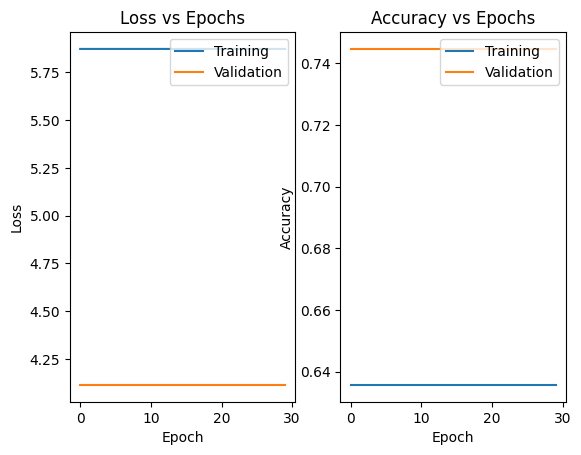

In [ ]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(MLP_tuner_history.history['loss'])
plt.plot(MLP_tuner_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(MLP_tuner_history.history['accuracy'])
plt.plot(MLP_tuner_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
print(MLP_tuner_model.evaluate(training_padded, training_labels, verbose=2))
print("\n")

#### predict train data ######
df_train = pd.DataFrame()
df_train['real'] = training_labels
df_train['pred'] = MLP_tuner_model.predict(training_padded).reshape(1,len(training_padded))[0]
print(round(df_train))
print(MLP_tuner_model.evaluate(testing_padded,testing_labels, verbose=2))
print("\n")

# test data
df_test = pd.DataFrame()
df_test['real'] = testing_labels
df_test['pred'] = MLP_tuner_model.predict(testing_padded).reshape(1,len(testing_padded))[0]
print(round(df_test))

12/12 - 0s - 3ms/step - accuracy: 0.6631 - loss: 5.4302
[5.4301605224609375, 0.6631016135215759]


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
     real  pred
0       1   0.0
1       1   0.0
2       0   0.0
3       0   0.0
4       0   0.0
..    ...   ...
369     0   0.0
370     0   0.0
371     0   0.0
372     0   0.0
373     0   0.0

[374 rows x 2 columns]
4/4 - 0s - 7ms/step - accuracy: 0.6800 - loss: 5.1578
[5.157790660858154, 0.6800000071525574]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
     real  pred
0       1   0.0
1       0   0.0
2       0   0.0
3       1   0.0
4       1   0.0
..    ...   ...
120     0   0.0
121     0   0.0
122     0   0.0
123     1   0.0
124     0   0.0

[125 rows x 2 columns]


In [ ]:
def CNN_model_builder(hp):
    vocab_size = 10000
    embedding_dim = 16
    hp_max_length = hp.Int('input_length', min_value=70, max_value=130, step=10)
    model = Sequential([
                      Embedding(vocab_size, embedding_dim, input_length=hp_max_length),
                      Conv1D(filters=2, kernel_size=3, activation='relu', name="Conv1D"),
                      AveragePooling1D(pool_size=3),
                      Flatten(),
                      Dense(2, activation='relu'),
                      Dense(1, activation='sigmoid', name="Outpul_layer")
                      ])
    opt = 'adam'
    loss_fun = 'binary_crossentropy'
    acc = ['accuracy']

    model.compile(
        optimizer = opt,
        loss = loss_fun,
        metrics = acc
        )

    return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=15,
                     factor=3,
                     )

NameError: name 'kt' is not defined

In [ ]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(training_padded,
             training_labels,
             validation_split=0.1,
             epochs=num_epochs,
             callbacks=[stop_early],
             verbose=2)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""The hyperparameter search is complete.
The best 'input_length' for the embedding layer is {best_hps.get('input_length')}
""")

Trial 7 Complete [00h 00m 03s]
val_accuracy: 0.7368420958518982

Best val_accuracy So Far: 0.7368420958518982
Total elapsed time: 00h 00m 20s
The hyperparameter search is complete.
The best 'input_length' for the embedding layer is 120



In [ ]:
CNN_2_model = tuner.hypermodel.build(best_hps)

CNN2_history = CNN_2_model.fit(training_padded,
                    training_labels,
                    validation_split=0.1,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
11/11 - 2s - 227ms/step - accuracy: 0.6548 - loss: 0.6803 - val_accuracy: 0.7368 - val_loss: 0.6600
Epoch 2/30
11/11 - 0s - 16ms/step - accuracy: 0.6548 - loss: 0.6547 - val_accuracy: 0.7368 - val_loss: 0.6319
Epoch 3/30
11/11 - 0s - 28ms/step - accuracy: 0.6548 - loss: 0.6382 - val_accuracy: 0.7368 - val_loss: 0.6136
Epoch 4/30
11/11 - 0s - 27ms/step - accuracy: 0.6548 - loss: 0.6314 - val_accuracy: 0.7368 - val_loss: 0.6089
Epoch 5/30
11/11 - 0s - 22ms/step - accuracy: 0.6548 - loss: 0.6278 - val_accuracy: 0.7368 - val_loss: 0.6126
Epoch 6/30
11/11 - 0s - 10ms/step - accuracy: 0.6548 - loss: 0.6194 - val_accuracy: 0.7368 - val_loss: 0.6106
Epoch 7/30
11/11 - 0s - 10ms/step - accuracy: 0.6548 - loss: 0.6123 - val_accuracy: 0.7368 - val_loss: 0.6080
Epoch 8/30
11/11 - 0s - 11ms/step - accuracy: 0.6548 - loss: 0.6030 - val_accuracy: 0.7368 - val_loss: 0.6054
Epoch 9/30
11/11 - 0s - 12ms/step - accuracy: 0.6548 - loss: 0.5892 - val_accuracy: 0.7368 - val_loss: 0.6064
Epoch 10/

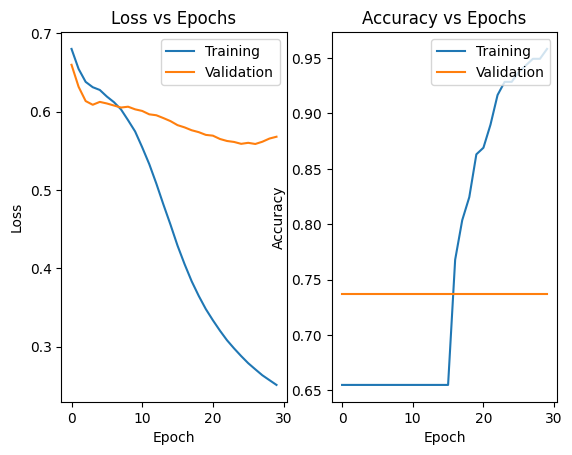

In [ ]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(CNN2_history.history['loss'])
plt.plot(CNN2_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(CNN2_history.history['accuracy'])
plt.plot(CNN2_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()